
# Bibliometrical analysis of "gold standard" German law journals

uses the list derived from Gröls/Gröls 2009 as the "gold standard"

In [5]:
%load_ext autoreload
%autoreload 2
import sys; 
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Show journals of gold standard list

In [8]:
import pandas as pd

df_groels = pd.read_csv('../data/gold/gold-groels-groels-2009.csv')
df_groels = df_groels[['title', 'abbreviation']]
df_groels.set_index('abbreviation', inplace=True)
df_groels.sort_index(inplace=True)
print(df_groels.to_markdown())

| abbreviation   | title                                                                                     |
|:---------------|:------------------------------------------------------------------------------------------|
| AG             | Die Aktiengesellschaft                                                                    |
| AVR            | Archiv des Volkerrechts                                                                   |
| AcP            | Archiv für die civilistische Praxis                                                       |
| AuR            | Arbeit und Recht                                                                          |
| AöR            | Archiv des öffentlichen Rechts                                                            |
| BB             | Betriebs-Berater                                                                          |
| CR             | Computer und Recht                                                                        |
|

## Show coverage of gold standard in bibliometric databases

In [9]:
import pandas as pd
df_kb = pd.read_csv(f'../data/kb_data/unversioned/eva_all_journals.csv')
df_kb = df_kb[["abk","in_wos","in_wos_emerging_sources_index","in_scp","in_openalex","in_crossref"]]
df_kb.replace({True: '✓', False: '✗'}, inplace=True)
df_kb.columns = df_kb.columns.str.replace('in_', '')
df_kb.rename(columns={'wos_emerging_sources_index': 'wos-esci'}, inplace=True)
df_kb.set_index('abk', inplace=True)
df_kb.fillna("", inplace=True)
df_kb

,wos,wos-esci,scp,openalex,crossref
abk,,,,,
AöR,✗,✗,✗,✓,✓
AcP,✗,✗,✗,✓,✓
DB,✗,✗,✗,✗,✗
Staat,✗,✗,✗,✓,✓
JZ,✗,✗,✗,✓,✓
JA,✗,✗,✗,✗,✗
JURA,✗,✗,✗,✓,✓
JR,✗,✗,✗,✓,✓
JuS,✗,✗,✗,✓,✗


Save it as a markdown document:

In [10]:
md_df = df_kb.replace({
    '✗':'<span style="background-color:red">✗</span>',
    '✓': '<span style="background-color:green">✓</span>' })
print(md_df.to_markdown('../data/kb_data/eva_all_journals_in_dbs.md'))

None


Display as a coloured table:

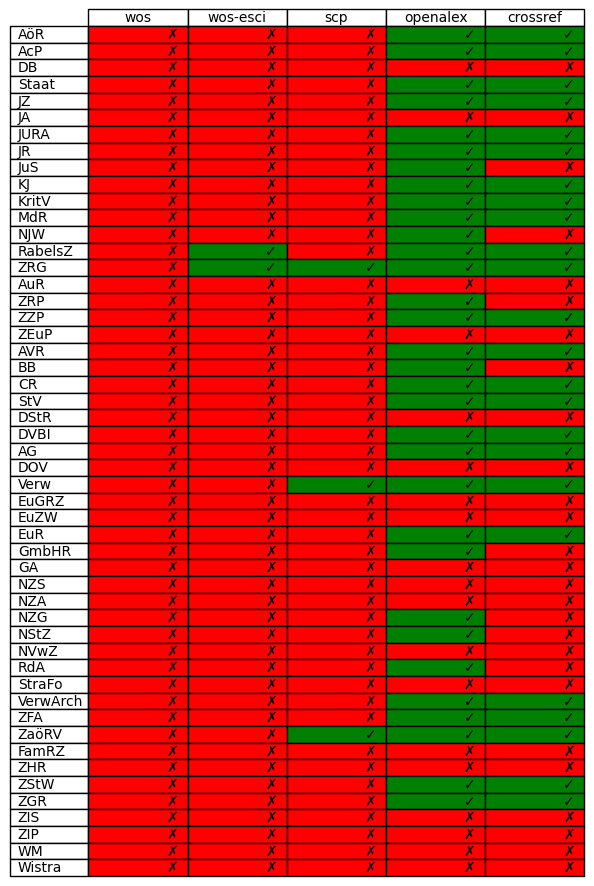

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Define colors based on dataframe values
colors = np.where(df_kb.values=='✓', 'green', np.where(df_kb.values=='✗', 'red', 'white'))
fig, ax = plt.subplots()
ax.axis('off')
table = plt.table(cellText=df_kb.values,
                  colLabels=df_kb.columns,
                  rowLabels=df_kb.index,
                  cellColours=colors,
                  loc='center')
plt.show()

## Show available metadata in OpenAlex, given all publication years

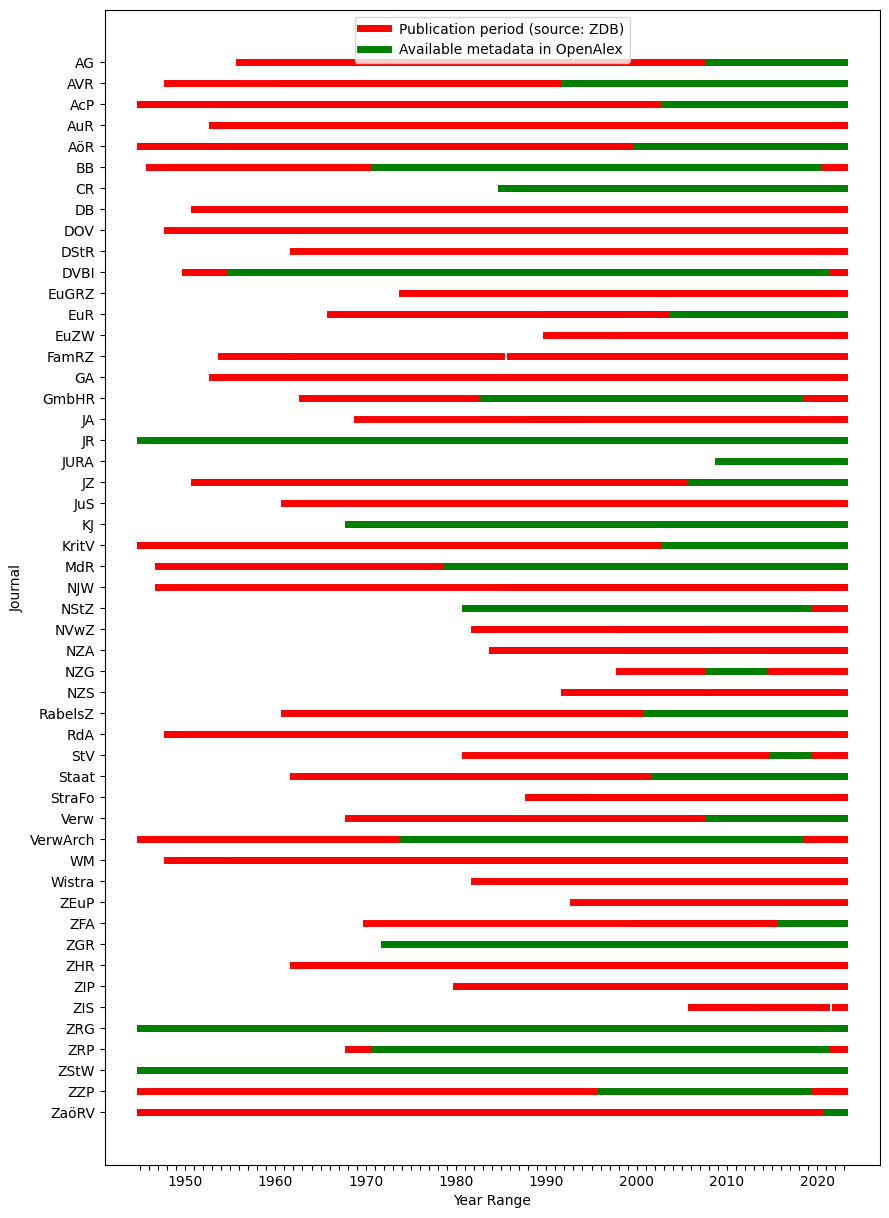

In [41]:
import pandas as pd
from lib.visualizations import compare_coverage_kb_zdb
df_kb = pd.read_csv('data\kb_data\eva_all_journals.csv').sort_values(by='abk', ascending=False)
df_zdb = pd.read_csv('data\zdb\journal_publication_periods.csv')
compare_coverage_kb_zdb(df_kb, df_zdb, min_year=1945, max_year=2023)

## Compute intersection of gold journals with other sources

### Intenet lists

In [82]:
%autoreload 2
from lib.intersections import compute_csv_intersections
data = {
    'groels+groels (2009)': 'data/gold/gold-groels-groels-2009.csv', 
    'jura-recherche.de': 'data/web_lists/jura-recherche.de-2024-12-13.csv',
    'juris (2002)': 'data/web_lists/juris-ingested-journals-2002.csv',
    'openjur.de': 'data/web_lists/openjur.de-2024-12-13.csv',
    'wikipedia': 'data/wikipedia/category-law-journal-germany-with-issn.csv'
}

labels, paths = zip(*data.items())
matrix = compute_csv_intersections(paths, by='abbreviation', lowercase=True, separator=',')
matrix

,0,1,2,3,4
0,52.0,43.0,33.0,32.0,35.0
1,43.0,253.0,88.0,99.0,116.0
2,33.0,88.0,358.0,66.0,72.0
3,32.0,99.0,66.0,173.0,58.0
4,35.0,116.0,72.0,58.0,147.0


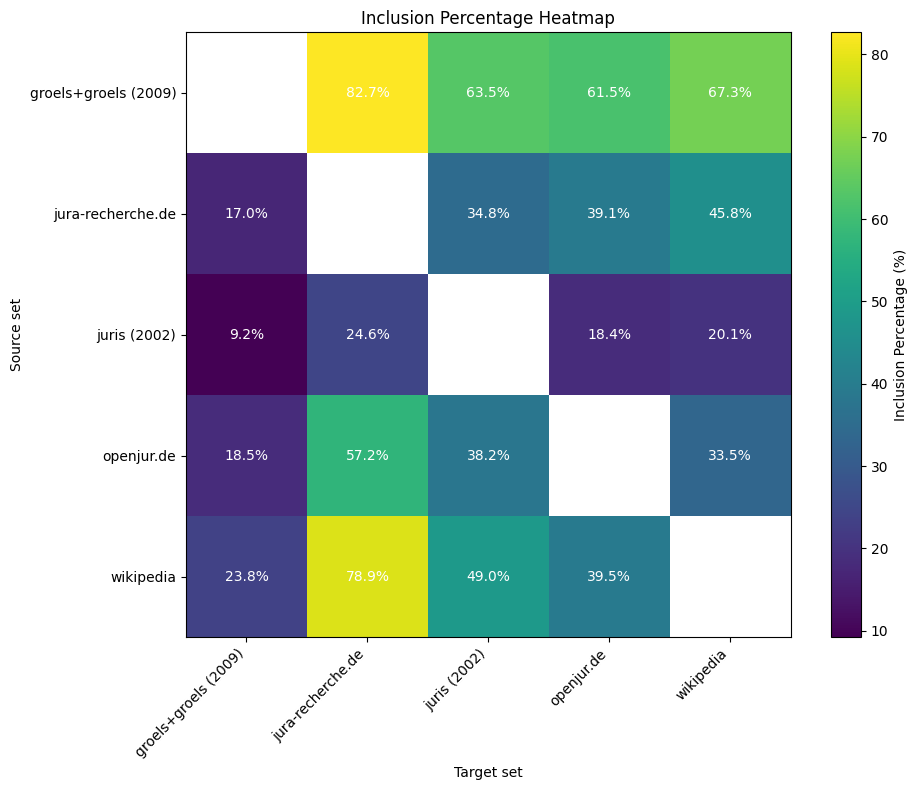

In [83]:
%autoreload 2
from lib.intersections import heatmap_inclusion_percentage
heatmap_inclusion_percentage(matrix, labels=labels)

Create tables allowing to compare the different lists

In [79]:
%autoreload 2
from lib.intersections import set_comparison_table
from itertools import combinations

abbr_sets = { label: set(pd.read_csv(path)['abbreviation'].dropna()) for label, path in data.items()  }
for i, j in combinations(range(len(abbr_sets)), 2):
    set_A = list(abbr_sets.values())[i]
    set_B = list(abbr_sets.values())[j]
    label_A = list(abbr_sets.keys())[i].replace(' ','-')
    label_B = list(abbr_sets.keys())[j].replace(' ','-')
    comparison_file = f'data/comparisons/{label_A}_{label_B}.txt'
    with open(comparison_file, 'w', encoding='utf-8') as f:
        print(comparison_file)
        f.write(set_comparison_table([set_A, set_B], [label_A, label_B]))


data/comparisons/groels+groels-(2009)_jura-forum.de.txt
data/comparisons/groels+groels-(2009)_jura-recherche.de.txt
data/comparisons/groels+groels-(2009)_juris-(2002).txt
data/comparisons/groels+groels-(2009)_openjur.de.txt
data/comparisons/groels+groels-(2009)_wikipedia.txt
data/comparisons/jura-forum.de_jura-recherche.de.txt
data/comparisons/jura-forum.de_juris-(2002).txt
data/comparisons/jura-forum.de_openjur.de.txt
data/comparisons/jura-forum.de_wikipedia.txt
data/comparisons/jura-recherche.de_juris-(2002).txt
data/comparisons/jura-recherche.de_openjur.de.txt
data/comparisons/jura-recherche.de_wikipedia.txt
data/comparisons/juris-(2002)_openjur.de.txt
data/comparisons/juris-(2002)_wikipedia.txt
data/comparisons/openjur.de_wikipedia.txt
